# 🏠 House Price Prediction - Jupyter Notebook
This notebook uses the Ames Housing dataset to train a machine learning model that predicts house prices based on selected features.

In [9]:
# 1. Import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [10]:
# 2. Load dataset
# Load dataset
df = pd.read_csv("AmesHousing.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [16]:
# 3. Select key features
features = ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Total Bsmt SF', 'Full Bath', 'Year Built']
target = 'SalePrice'

X = df[features]
y = df[target]

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 1078869080.17
R^2 Score: 0.87


In [18]:
# 7. Predict for a sample input
sample_input = pd.DataFrame({
    'Overall Qual': [7],
    'Gr Liv Area': [1800],
    'Garage Cars': [2],
    'Total Bsmt SF': [1000],
    'Full Bath': [2],
    'Year Built': [2005]
})

predicted_price = model.predict(sample_input)
print(f"Predicted Price: ${predicted_price[0]:,.2f}")

Predicted Price: $215,082.66


In [19]:
# 8. Optional: Save the model for Streamlit
joblib.dump(model, 'house_price_model.pkl')

['house_price_model.pkl']

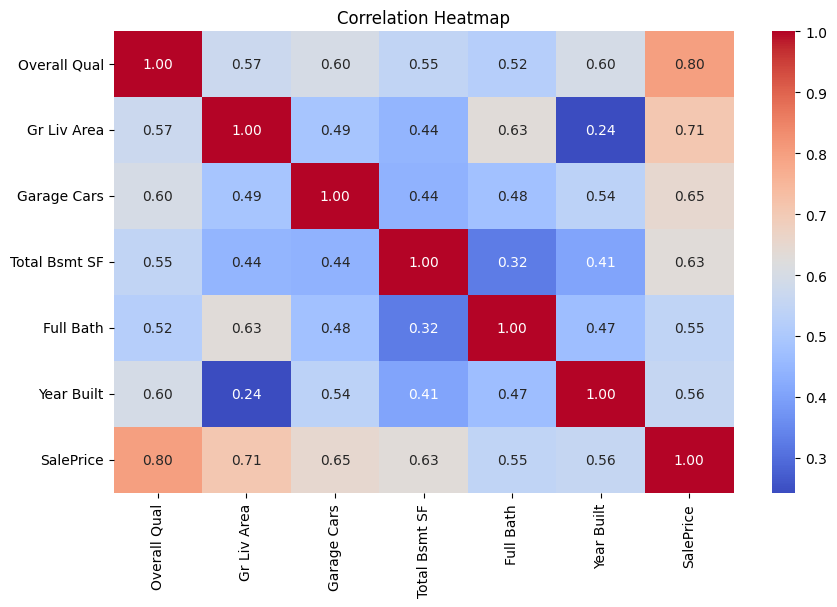

In [20]:
# 9. Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df[features + [target]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

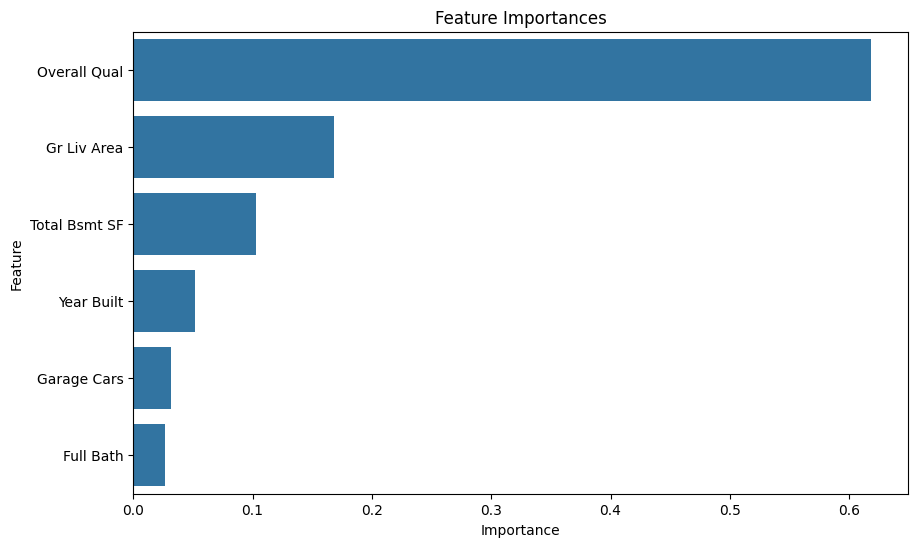

In [21]:
# 10. Feature Importance Plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = [features[i] for i in indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [23]:
# 11. Interactive Prediction with ipywidgets
import ipywidgets as widgets
from IPython.display import display

# Create widgets for input
OverallQual_widget = widgets.IntSlider(value=5, min=1, max=10, description='OverallQual')
GrLivArea_widget = widgets.IntSlider(value=1500, min=500, max=4000, step=100, description='GrLivArea')
GarageCars_widget = widgets.IntSlider(value=2, min=0, max=4, description='GarageCars')
TotalBsmtSF_widget = widgets.IntSlider(value=1000, min=0, max=3000, step=100, description='BsmtSF')
FullBath_widget = widgets.IntSlider(value=2, min=0, max=4, description='FullBath')
YearBuilt_widget = widgets.IntSlider(value=2000, min=1900, max=2022, step=1, description='YearBuilt')

# Display widgets
display(OverallQual_widget, GrLivArea_widget, GarageCars_widget, TotalBsmtSF_widget, FullBath_widget, YearBuilt_widget)

# Button to trigger prediction
predict_button = widgets.Button(description="Predict Price")
output = widgets.Output()

def on_button_click(b):
    with output:
        output.clear_output()
        sample = pd.DataFrame({
            'Overall Qual': [OverallQual_widget.value],
            'Gr Liv Area': [GrLivArea_widget.value],
            'Garage Cars': [GarageCars_widget.value],
            'Total Bsmt SF': [TotalBsmtSF_widget.value],
            'Full Bath': [FullBath_widget.value],
            'Year Built': [YearBuilt_widget.value]
        })
        prediction = model.predict(sample)
        print(f"🏠 Predicted House Price: ${prediction[0]:,.2f}")

predict_button.on_click(on_button_click)
display(predict_button, output)

IntSlider(value=5, description='OverallQual', max=10, min=1)

IntSlider(value=1500, description='GrLivArea', max=4000, min=500, step=100)

IntSlider(value=2, description='GarageCars', max=4)

IntSlider(value=1000, description='BsmtSF', max=3000, step=100)

IntSlider(value=2, description='FullBath', max=4)

IntSlider(value=2000, description='YearBuilt', max=2022, min=1900)

Button(description='Predict Price', style=ButtonStyle())

Output()